# Well log visualization and interpretation demo

### Honggeun Jo, Assistant Professor, Inha University (Korea)
This demo showcases an interpretation of realistic well logs using various Python functionalities and packages, such as Pandas. Well logs are typically stored in LAS format, where each well log has multiple "columns" and is indexed based on the MeasurementDepth. However, for easier interpretation, we assume that the LAS file has been converted to CSV format, which can be conveniently opened in MS Excel. Since well logs can have over 8000+ data points (usually measured every 10 cm or 1/2 foot), it is highly recommended to use Python for automated interpretation. The workflow for this demo follows the following steps:

1. Load open source packages and define a function to visualize well logs.
2. Import the CSV file into Python using Pandas.
3. Visualize the well logs.
4. Smooth the well logs using Gaussian Filtering.
5. **Convert the Gamma-ray log to Vsh (refer to the lecture note Chap 7).**
6. **Convert the Resistivity Deep log to Sw (refer to the lecture note Chap 7).**

The demo is presented by Honggeun Jo, an Assistant Professor at Inha University (Korea). You can reach out to him through his contacts on [Youtube/whghdrms](https://www.youtube.com/@whghdrms) | [GitHub/whghdrms](https://github.com/whghdrms) |  [GoogleScholar](https://scholar.google.com/citations?user=u0OE5CIAAAAJ&hl=en) | [LinkedIn](https://www.linkedin.com/in/honggeun-jo/)

If you have any question regarding the data, I highly recommend contact Wen Pan, the best expert that I know :) 


## 1. Load packages and function to use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter, median_filter

def visual_well_logs(df, 
                    title = 'Well Logs',
                    columns = {'GR':'API', 
                               'RHOB':'g/cc', 
                               'NPHI':'fraction', 
                               'RD': 'Ωm'},
                    add_columns = {},
                    ylim = [],
                    raw_off = False):
    """
    Function for visualizing well logs vs. Depth
    
    Parameters
    --------------
    df (pandas.DataFrame): dataFrame that contains well logs
    title (str): name of the figure
    columns (dict): keys are type of well logs to visualize, and value is unit of the well log
    add_columns (dict): keys are additional parameters (e.g., saturation or Vsh) whose value is the unit
    ylim (list): range of depth to visualize. Please note that smaller values comes later, e.g., ylim = [4000, 3000], not [3000, 4000]
    raw_off (boolean): to turn on/off raw well logs
    
    
    Example
    --------------
    >>> visual_well_log(df)
    
    >>> visual_well_log(df, title = 'Well Log for Well #2')
    
    >>> visual_well_log(df, add_columns = {'Vsh':'%', 'Sw':'%'})
    
    >>> visual_well_log(df, ylim = [4000,3000])
    
    """
    # To check data frame has all the columns to visualize: 
    for col in list(columns.keys())+list(add_columns.keys()):
        assert col in df.columns, f'No {col} is in the given DataFrame'
    # To check if the depth is given:
    assert 'DEPT' in df.columns, 'No Depth information found in the given DataFrame'
        
        
    # To set up subplots:
    fig, axs = plt.subplots(1, len(columns)+len(add_columns), 
                            figsize=(3*(len(columns)+len(add_columns)),8), 
                            sharey=True)
    # Add title above the plot
    plt.suptitle(title)
    
    # Transparency of lines
    if raw_off == True: 
        alpha = 0.0
    else:
        alpha = 1
        
    # individual subplots 
    for i, [col, unit] in enumerate(list(columns.items())):
        axs[i].plot(df[col].values, df.DEPT.values, alpha=alpha)
        axs[i].set_title(col)
        if i == 0: axs[i].set_ylabel('Depth')
        axs[i].set_xlabel(f'Unit: {unit}')
        axs[i].grid('on')
    
    # if we have filtered well logs, visualize them too
    if all([f'{col}_filtered' in df.columns  for col in columns.keys()]):
        for i, [col, unit] in enumerate(list(columns.items())):
            axs[i].plot(df[f'{col}_filtered'].values, df.DEPT.values,  color ='tab:orange')
            if (i == 0) and (raw_off == False): axs[i].legend(['Raw','Smoothed'])
                    
    # (optional) additional subplots 
    for i, [col, unit] in enumerate(list(add_columns.items())):
        axs[i+len(columns)].plot(df[col].values, df.DEPT.values, color = 'tab:green')
        axs[i+len(columns)].set_title(col)
        axs[i+len(columns)].set_xlabel(f'Unit: {unit}')
        axs[i+len(columns)].grid('on')
    
    # To flip y axis (so that increase downward)
    if len(ylim) != 0: plt.ylim(ylim)
    plt.gca().invert_yaxis()
    plt.tight_layout()

def visual_well_log(df, 
                    well_log = 'GR',
                    unit = 'API',
                    ylim = [],
                    raw_off = False):
    """
    Function for visualizing well log vs. Depth
    
    Parameters
    --------------
    df (pandas.DataFrame): dataFrame that contains well logs
    well_log (str): well log to visualize
    unit (str): the unit of well log
    ylim (list): range of depth to visualize. Please note that smaller values comes later, e.g., ylim = [4000, 3000], not [3000, 4000]
    raw_off (boolean): to turn on/off raw well logs
    
    
    Example
    --------------
    >>> visual_well_log(df)
    
    """
    # To check data frame has all the columns to visualize: 
    assert well_log in df.columns, f'No {col} is in the given DataFrame'
    # To check if the depth is given:
    assert 'DEPT' in df.columns, 'No Depth information found in the given DataFrame'
        
        
    # To set up subplots:
    fig, axs = plt.subplots(1, 1, 
                            figsize=(3,8), 
                            sharey=True)
    
    # individual subplots 
    if raw_off == False:
        axs.plot(df[well_log].values, df.DEPT.values)
    axs.set_title(well_log)
    axs.set_ylabel('Depth')
    axs.set_xlabel(f'Unit: {unit}')
    axs.grid('on')
    
    # if we have filtered well logs, visualize them too
    if well_log+'_filtered' in df.columns:
        axs.plot(df[f'{well_log}_filtered'].values, df.DEPT.values, color ='tab:orange')
        if (raw_off == True): axs.legend(['Raw','Smoothed'])
                    
    
    # To flip y axis (so that increase downward)
    if len(ylim) != 0: plt.ylim(ylim)
    plt.gca().invert_yaxis()
    plt.tight_layout()


## 2. Load Well Log (DataFrame)

In [2]:
# Load data frame using pandas
df = pd.read_csv("aligned_well_01_new.csv") 

In [3]:
# check head of DataFrame
df.head()

,DEPT,GR,RHOB,NPHI,RD
0,411.0,94.007,2.2421,0.4,30.0
1,411.5,95.009,2.2631,0.4,30.0
2,412.0,96.101,2.2757,0.4,30.0
3,412.5,95.683,2.2726,0.4,30.0
4,413.0,93.025,2.2764,0.4,30.0


In [4]:
# check statistics of DataFrame
df.describe()

,DEPT,GR,RHOB,NPHI,RD
count,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000
mean,2631.000000,113.676025,2.491644,0.277807,6.898646
std,1281.934102,27.044928,0.074225,0.053916,2.972337
min,411.000000,25.625000,2.000000,0.062100,1.333300
25%,1521.000000,96.988000,2.459400,0.246000,5.279500
50%,2631.000000,107.593000,2.501000,0.280200,6.510600
75%,3741.000000,127.360000,2.538700,0.308100,7.977400
max,4851.000000,246.983000,2.767900,0.400000,30.000000


## 3. Visualize Well Logs (by using pre-defined function)

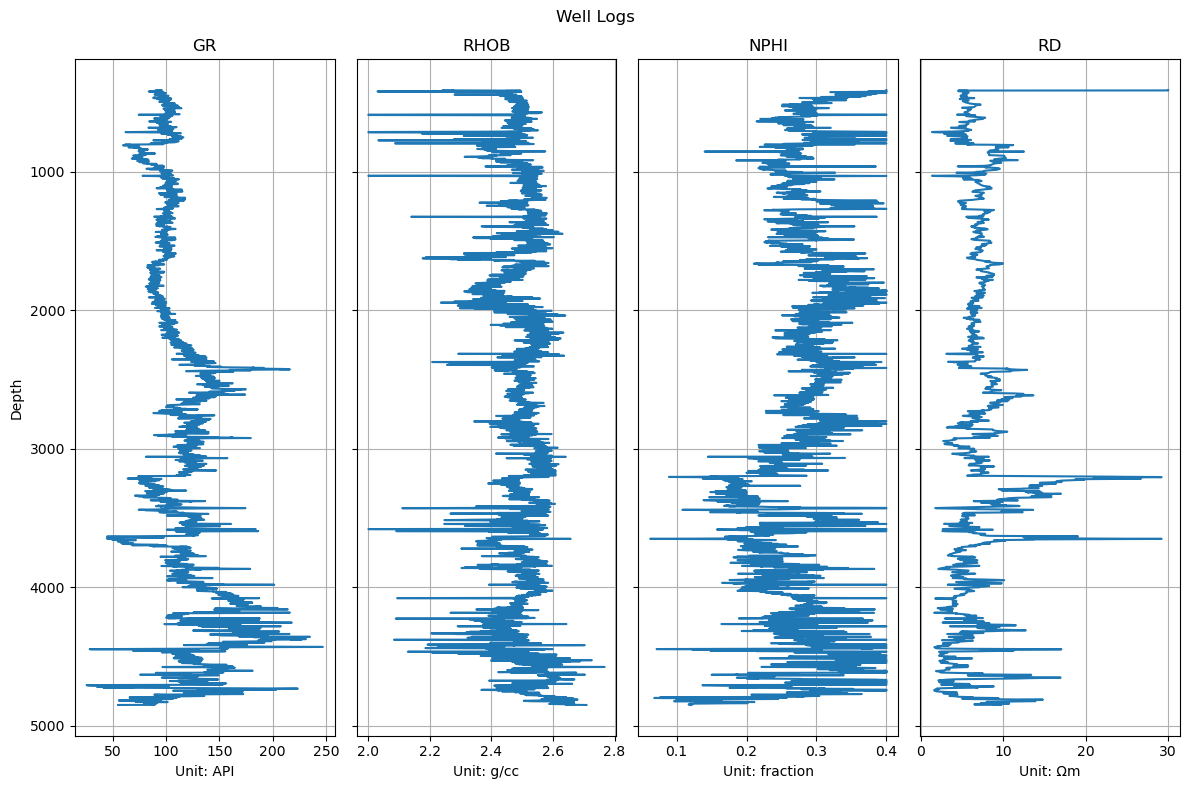

In [5]:
visual_well_logs(df)

## 4. Smoothing Well Logs (by Gaussian filtering)
for the reference of **Gaussian Filtering**, please refer to the following [link]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter1d.html')

Here is an example of 1D Gaussian filtering:
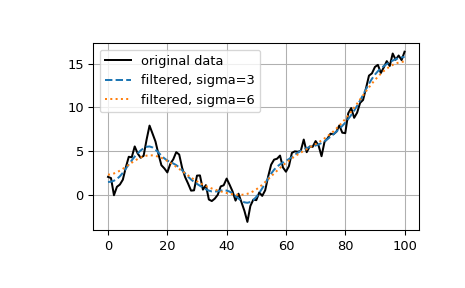

In [6]:
# Smoothing well logs, note that "sigma" controls the level of smoothness
# Please always save the new columns under the name of "NAME_filtered", otherwise it won't be shown in visual_well_log
df['GR_filtered'] = gaussian_filter(df.GR, sigma = 5)
df['RHOB_filtered'] = gaussian_filter(df.RHOB, sigma = 7)
df['NPHI_filtered'] = gaussian_filter(df.NPHI, sigma = 5)
df['RD_filtered'] = gaussian_filter(df.RD, sigma = 5)

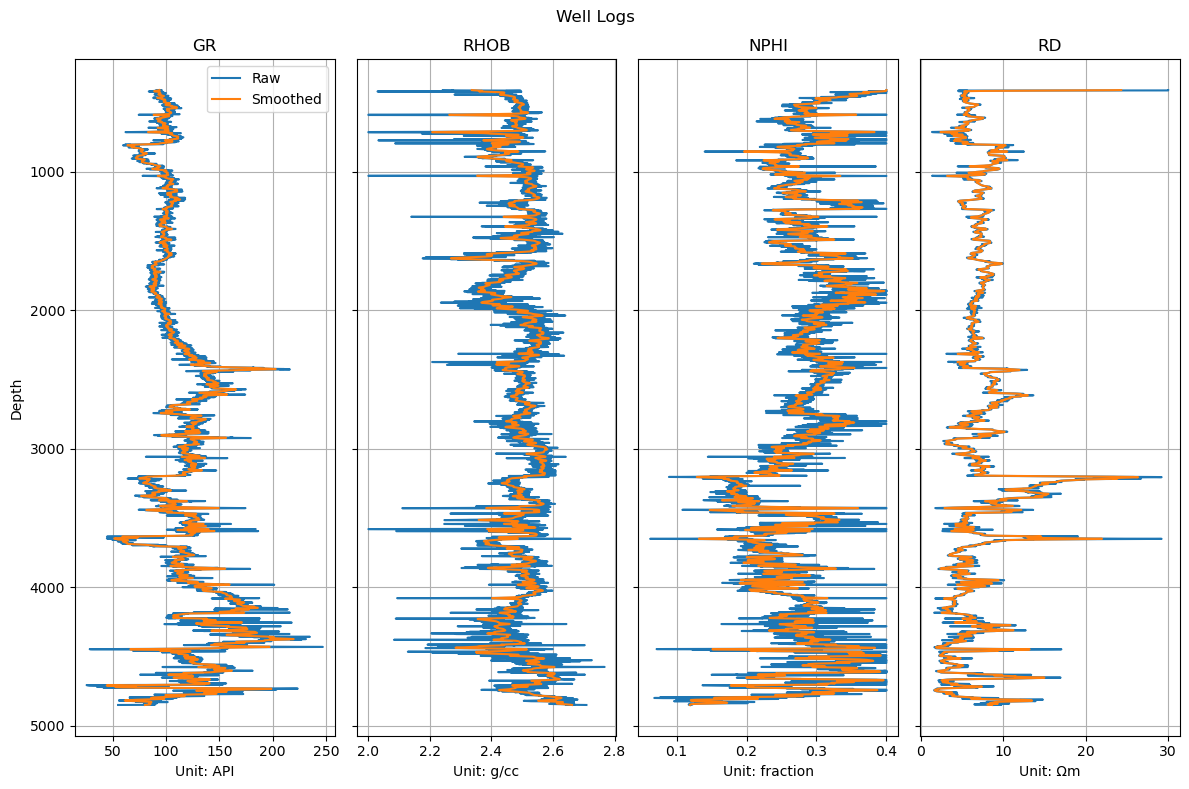

In [7]:
visual_well_logs(df)

Note that we will focus depth between 3,000 and 4,000 as we can observe two promising Sand formation as well as low Resistivity (High HC saturation)

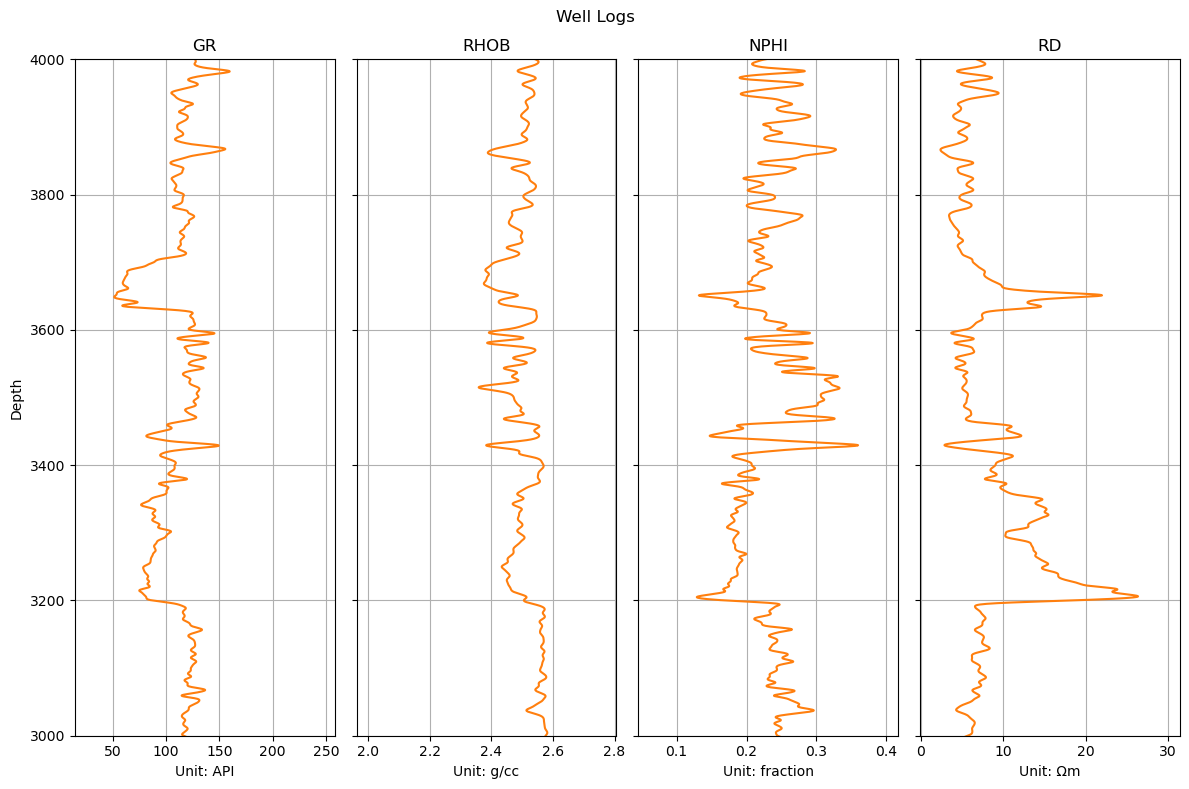

In [8]:
visual_well_logs(df, ylim = [4000,3000], raw_off=True)

In [9]:
# To save another dataframe
df_trimmed = df[(df.DEPT>3000 )&(df.DEPT<4000 )]
df_trimmed = df_trimmed.reset_index()

## 5. Compute Vsh

For the reference, I attached a slide that we discussing during our class:

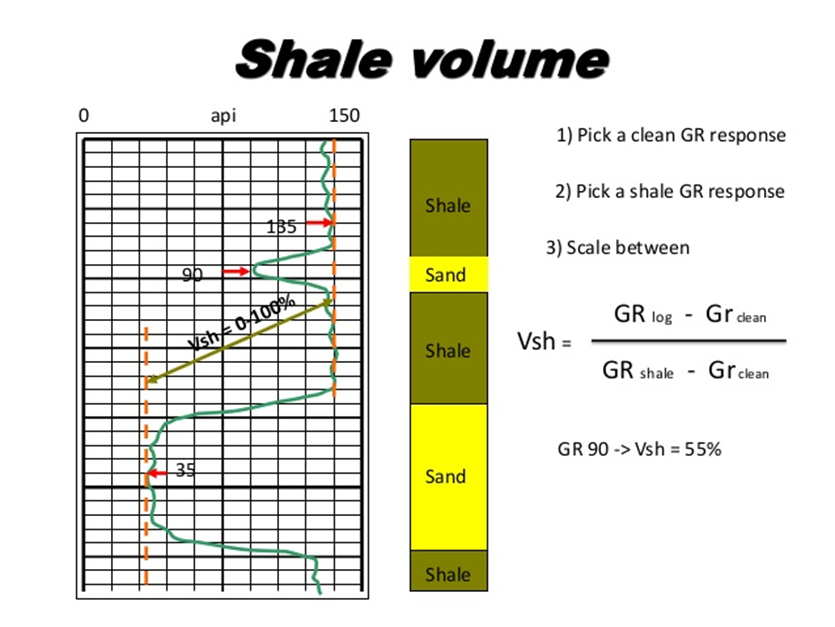

In [10]:
df_trimmed

,index,DEPT,GR,RHOB,NPHI,RD,GR_filtered,RHOB_filtered,NPHI_filtered,RD_filtered
0,5179,3000.5,111.452,2.5939,0.2480,6.0710,115.845262,2.576957,0.243703,5.786111
1,5180,3001.0,111.472,2.5942,0.2519,6.4740,115.427969,2.577848,0.243234,5.883094
2,5181,3001.5,111.468,2.5867,0.2491,6.4490,115.184662,2.578732,0.242912,5.968296
3,5182,3002.0,112.551,2.5819,0.2471,6.3750,115.111890,2.579559,0.242672,6.040046
4,5183,3002.5,113.833,2.5866,0.2442,6.3010,115.192832,2.580285,0.242469,6.098020
...,...,...,...,...,...,...,...,...,...,...
1994,7173,3997.5,132.425,2.5476,0.2300,6.9171,127.899574,2.551853,0.217186,7.230883
1995,7174,3998.0,134.756,2.5502,0.2447,6.7233,127.775910,2.550657,0.218732,7.140698
1996,7175,3998.5,132.125,2.5549,0.2364,6.7531,127.646138,2.549113,0.220368,7.053224
1997,7176,3999.0,125.702,2.5605,0.2194,6.8309,127.578315,2.547247,0.222169,6.967543


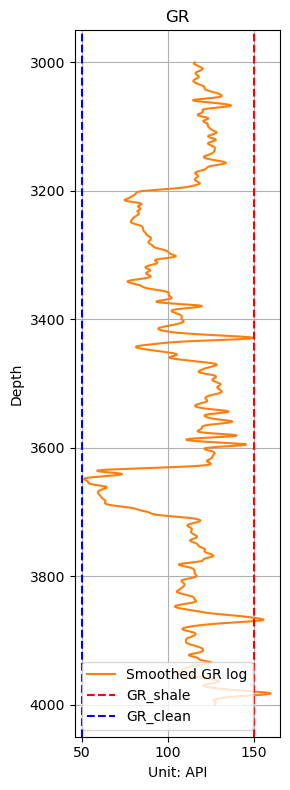

In [11]:
# Visualize gamma ray log as well as GR_clean/shale
visual_well_log(df_trimmed, raw_off=True)
plt.axvline(x=150, color = 'r', linestyle ='--',)
plt.axvline(x=50, color = 'b', linestyle ='--',)
plt.legend(['Smoothed GR log','GR_shale','GR_clean'])


In [12]:
# Compute Vsh
GR_clean = 50 
GR_shale = 150 
df_trimmed['Vsh'] = (df_trimmed.loc[:,'GR_filtered'] - GR_clean)/(GR_shale-GR_clean)*100

# Vsh should not be lower than 0% or larger than 100%
df_trimmed.loc[df_trimmed['Vsh']<0,'Vsh'] = 0
df_trimmed.loc[df_trimmed['Vsh']>100,'Vsh'] = 100

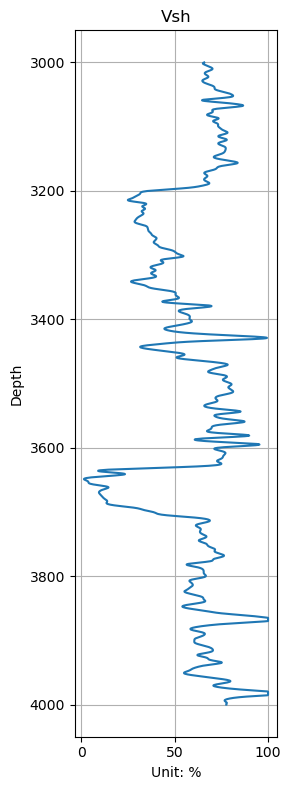

In [13]:
# Visualize Vsh
visual_well_log(df_trimmed, well_log='Vsh',unit='%')


## 6. Compute Sw
For the reference, I attached a slide that we discussing during our class:

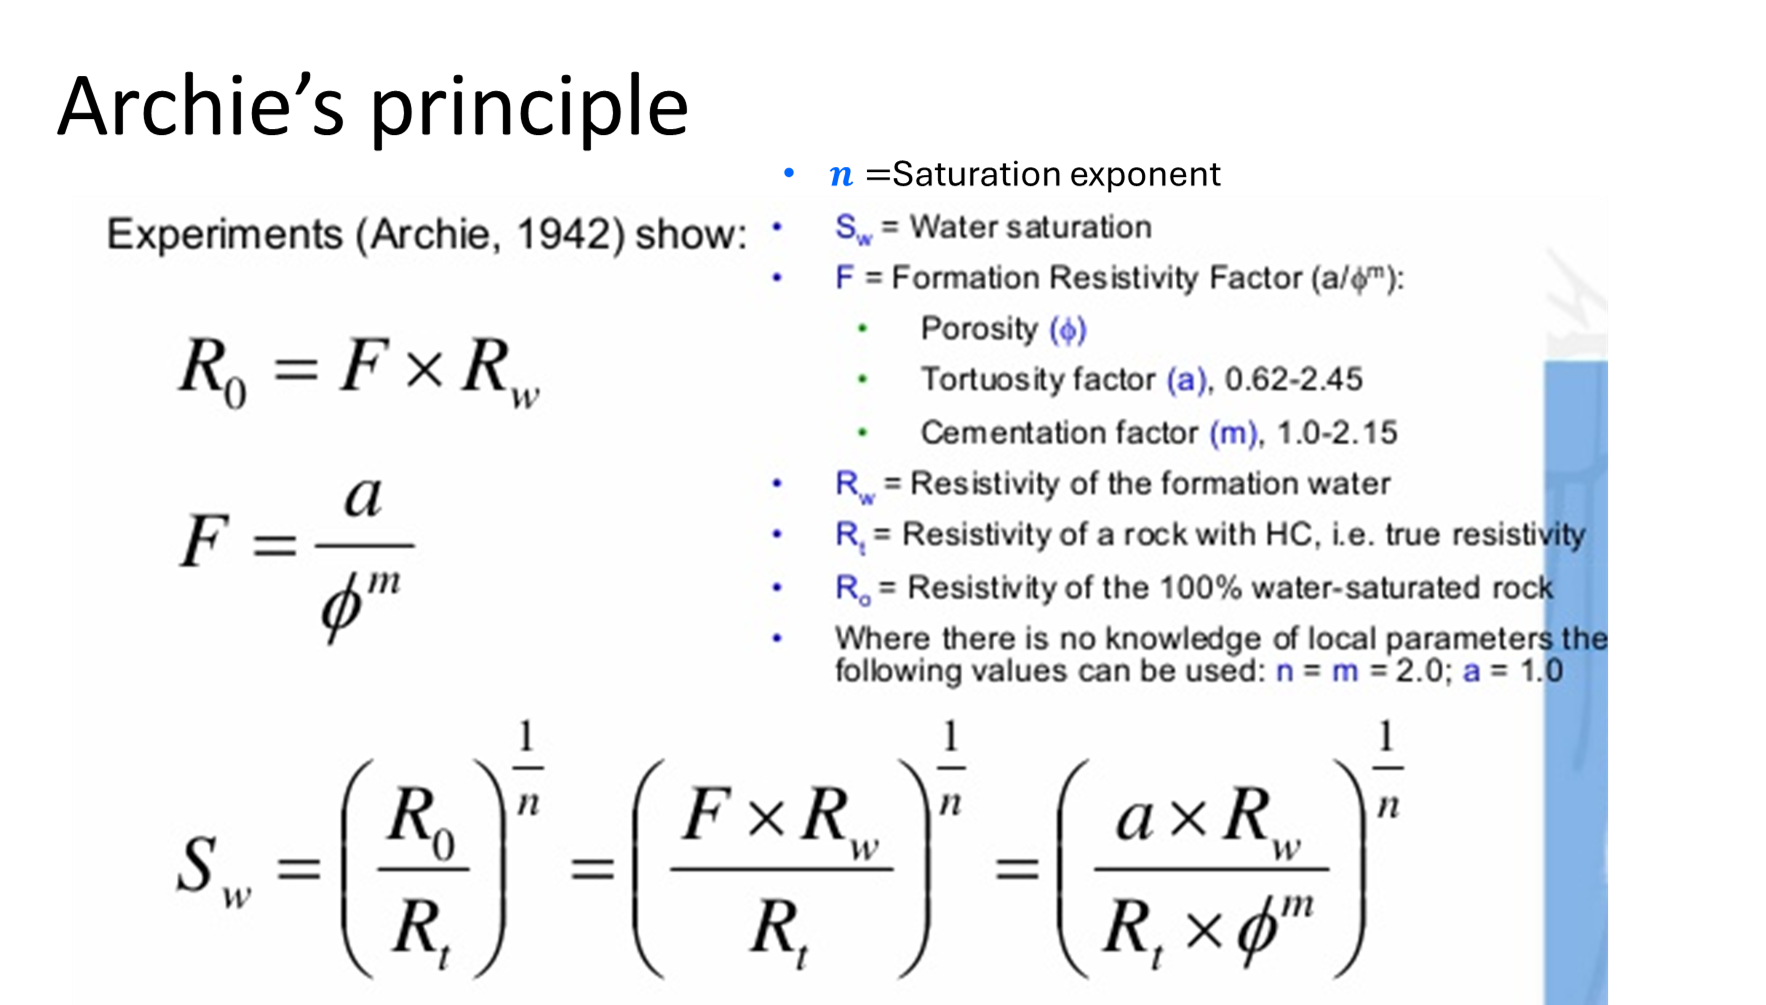

(0.0, 30.0)

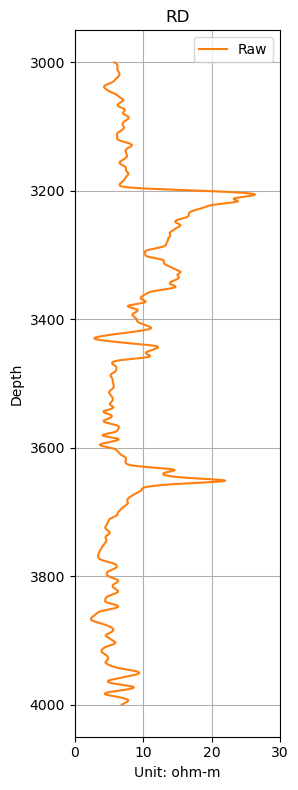

In [14]:
# Visaulize resistivity log
visual_well_log(df_trimmed, well_log='RD',unit='ohm-m',raw_off=True)
plt.xlim([0,30])

Let n = m = 2.0, Rw = 0.3 ohm-m and a = 1.0, then

In [15]:
# Define the constants and Rw:
a = 1
n = 2
m = 2
Rw = .3
porosity = df_trimmed['NPHI_filtered']

# compute Sw from Archie's eqn:
df_trimmed['Sw'] = (a*Rw/df_trimmed['RD_filtered']/porosity**m)**(1/n)*100

# Assure that Sw>0 and Sw<1
df_trimmed.loc[df_trimmed['Sw']>100,'Sw'] = 100
df_trimmed.loc[df_trimmed['Sw']<0,'Sw'] = 0

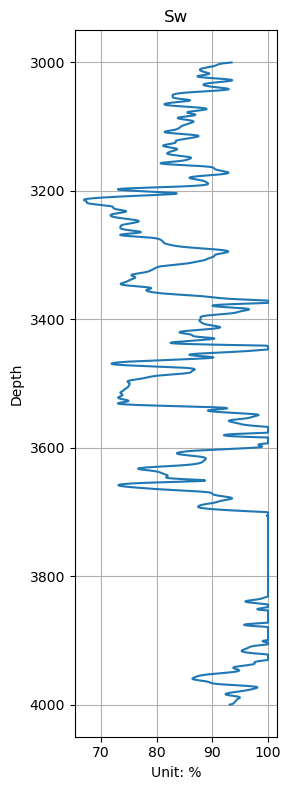

In [16]:
# Visualize Sw
visual_well_log(df_trimmed, well_log='Sw',unit='%')


## 7. Final visualization

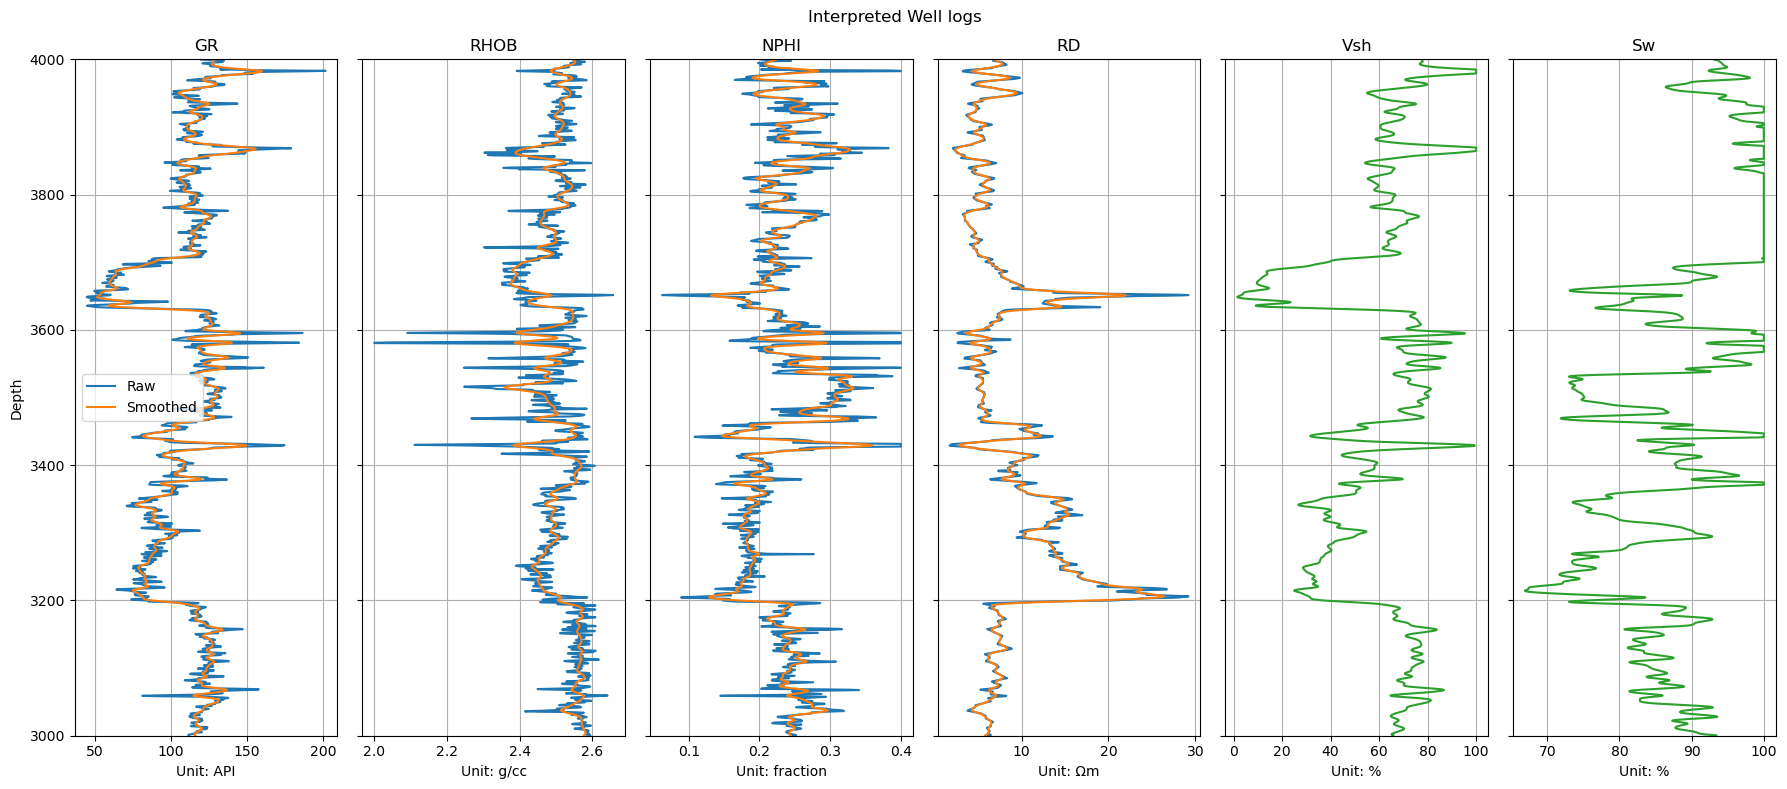

In [17]:
visual_well_logs(df_trimmed, title = 'Interpreted Well logs',add_columns={'Vsh':'%', 'Sw':'%'}, ylim=[4000,3000],)

I hope you find this code and demonstration useful. I'm always happy to discuss any question you may find,

*Honggeun*

**Honggeun Jo**, Ph.D., P.Eng. Assistant Professor The Department of Energy Resources Engineering, Inha University (Korea).
